In [2]:
import subprocess
import os
import sys
import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# Custom functions
sys.path.insert(1, '../..')
from utils import *

# scperturb package
sys.path.insert(1, '../../../package/src/')
from scperturb import *

%matplotlib inline

# Uhlitz et al. (+ new samples)

In [19]:
adata = sc.read("/fast/work/users/peidlis_c/data/NB013_singlecell_CRC_patients/scrnaseq/NB013_singlecell_CRC_patients_preprocessed_annotated.h5")

In [20]:
adata

AnnData object with n_obs × n_vars = 142608 × 33538
    obs: 'patient', 'condition', 'sample', 'organoid', 'topography_ICDO3', 'TNM_stage', 'TNM_grade', 'FFPE', 'diagnosis', 'MS_status', 'cna_clone', 'cna_score', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'percent_hemo', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'louvain', 'louvain_highres', 'epi_score', 'str_score', 'imm_score', 'celltype_1a', 'celltype_1a_score', 'celltype_1b', 'celltype_2'
    var: 'ncounts', 'ncells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'celltype_1a_colors', 'celltype_1b_colors', 'celltype_2_colors', 'condition_colors', 'diffmap_evals', 'hvg', 'louvain', 'neighbors', 'patient_colors', 'pca', 'phase_colors', 'sample_colors', 'umap'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

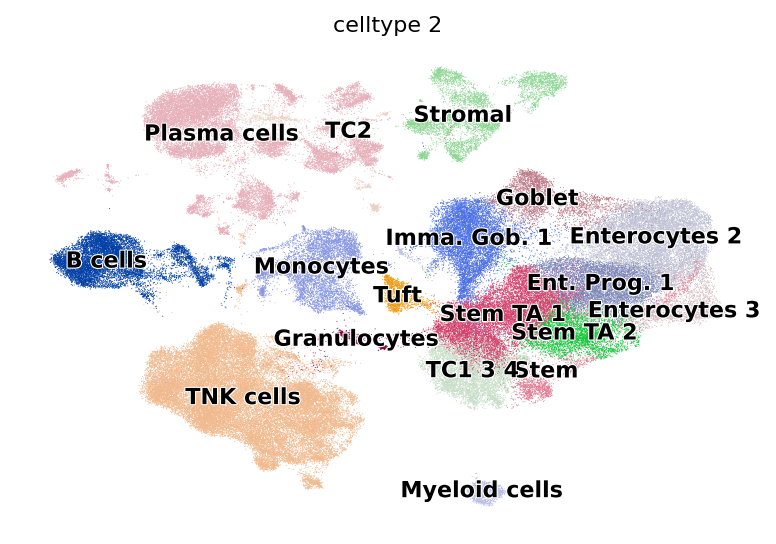

In [21]:
scv.pl.scatter(adata, color='celltype_2', dpi=160)

In [22]:
sdata = sc.pp.subsample(adata, fraction=0.1, copy=True)

In [23]:
ed = edist(sdata, 'celltype_2')

100%|██████████| 18/18 [00:05<00:00,  3.01it/s]


In [24]:
ed = cluster_matrix(ed, 'both')

In [25]:
pl.show()

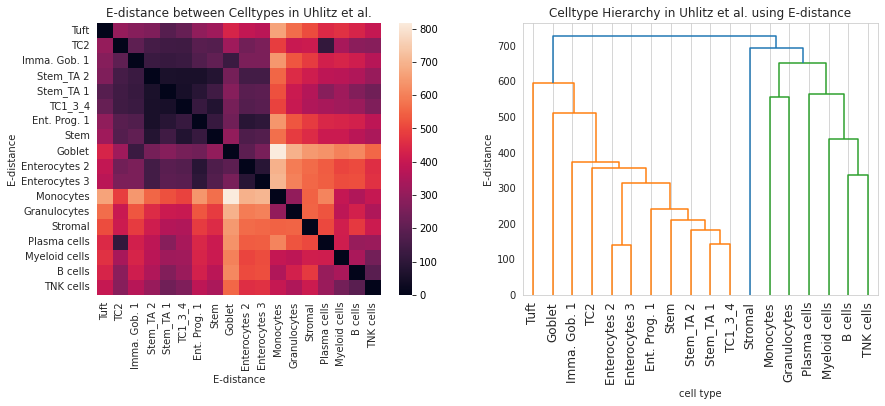

In [26]:
from scipy.cluster import hierarchy
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 2, figsize=[7*2,5])

ax = axs[0]
sns.heatmap(ed, ax=ax)
ax.set_title('E-distance between Celltypes in Uhlitz et al.')
ax.set_xlabel('E-distance')
ax.set_ylabel('E-distance')

ax=axs[1]
Z = hierarchy.linkage(ed, 'single')
dn = hierarchy.dendrogram(Z, labels=ed.columns, color_threshold=670, ax=ax)
pl.xticks(rotation=90)
pl.grid(axis='y')
pl.ylabel('E-distance')
pl.xlabel('cell type')
pl.title('Celltype Hierarchy in Uhlitz et al. using E-distance')
pl.show()

In [27]:
ed

,Tuft,TC2,Imma. Gob. 1,Stem_TA 2,Stem_TA 1,TC1_3_4,Ent. Prog. 1,Stem,Goblet,Enterocytes 2,Enterocytes 3,Monocytes,Granulocytes,Stromal,Plasma cells,Myeloid cells,B cells,TNK cells
Tuft,0.000000,305.474520,276.313274,263.936539,184.755286,216.251129,295.518598,322.137330,434.599654,390.494726,373.142664,664.351344,565.410409,513.366106,448.286661,462.838179,436.156800,398.172822
TC2,305.474520,0.000000,197.888593,147.502153,138.798581,136.830070,185.623105,180.045726,323.221361,237.582712,255.587691,486.486400,402.713638,410.722214,111.188146,340.708768,285.530099,278.801391
Imma. Gob. 1,276.313274,197.888593,0.000000,127.272574,119.330468,125.507541,173.091146,205.763726,127.167373,255.385731,256.725847,643.403415,526.948734,481.974238,421.007528,434.904403,415.970820,368.345919
Stem_TA 2,263.936539,147.502153,127.272574,0.000000,57.563708,55.042189,55.997695,78.563455,243.784136,145.329715,144.021367,552.222261,451.307635,416.391619,381.125458,375.260799,355.424824,312.121807
Stem_TA 1,184.755286,138.798581,119.330468,57.563708,0.000000,54.139520,88.571967,138.874489,275.367937,191.298514,195.796408,519.424745,405.910557,362.302504,280.284581,324.958850,269.574842,233.520694
TC1_3_4,216.251129,136.830070,125.507541,55.042189,54.139520,0.000000,120.304873,73.539154,247.885887,178.642328,188.328345,494.505464,400.642032,354.398114,340.173324,325.498147,313.452052,264.460772
Ent. Prog. 1,295.518598,185.623105,173.091146,55.997695,88.571967,120.304873,0.000000,118.115595,235.327829,86.866376,100.882052,638.849539,527.325207,484.675648,443.048637,436.759497,427.042641,380.276296
Stem,322.137330,180.045726,205.763726,78.563455,138.874489,73.539154,118.115595,0.000000,296.795957,166.265225,177.586339,568.328572,484.397787,451.835994,408.112474,406.159407,376.207684,346.499082
Goblet,434.599654,323.221361,127.167373,243.784136,275.367937,247.885887,235.327829,296.795957,0.000000,197.519488,248.792284,816.382605,694.039450,646.736677,633.196330,600.961053,612.335933,558.063766
Enterocytes 2,390.494726,237.582712,255.385731,145.329715,191.298514,178.642328,86.866376,166.265225,197.519488,0.000000,89.138291,694.281657,592.183879,561.887777,538.765523,499.919033,507.974377,457.455279


# 10x data

In [30]:
adata = sc.datasets.pbmc3k_processed()

In [7]:
sc.pp.highly_variable_genes(adata, n_top_genes=2000)
sc.pp.pca(adata)
ed = edist(adata, 'louvain')

100%|██████████| 8/8 [00:00<00:00, 32.78it/s]


In [8]:
ed

,CD4 T cells,B cells,CD14+ Monocytes,NK cells,CD8 T cells,FCGR3A+ Monocytes,Dendritic cells,Megakaryocytes
CD4 T cells,0.000000,251.430885,373.364552,491.822643,90.247257,287.569564,379.185208,4757.996448
B cells,251.430885,0.000000,489.038638,734.163137,340.666707,381.928806,356.664906,4926.125416
CD14+ Monocytes,373.364552,489.038638,0.000000,731.435252,445.785942,143.314733,364.070918,4702.873720
NK cells,491.822643,734.163137,731.435252,0.000000,279.016796,582.455379,690.210811,5176.196671
CD8 T cells,90.247257,340.666707,445.785942,279.016796,0.000000,337.246635,414.685519,4819.479231
FCGR3A+ Monocytes,287.569564,381.928806,143.314733,582.455379,337.246635,0.000000,473.013972,4625.588895
Dendritic cells,379.185208,356.664906,364.070918,690.210811,414.685519,473.013972,0.000000,4718.059173
Megakaryocytes,4757.996448,4926.125416,4702.873720,5176.196671,4819.479231,4625.588895,4718.059173,0.000000


## Dependence on HVGs

### pre-normalized

In [12]:
adata = sc.datasets.pbmc3k_processed()

In [55]:
eds = []
# ns = [adata.n_vars, 1750, 1500, 1250, 1000, 750, 500, 250, 100, 75, 50, 25, 10]
ns = np.linspace(2, adata.n_vars, num=25)
for n in tqdm(ns):
    sc.pp.highly_variable_genes(adata, n_top_genes=int(n))
    sc.pp.pca(adata)
    ed = edist(adata, 'louvain', verbose=False)
    eds.append(ed)

100%|██████████| 25/25 [00:14<00:00,  1.73it/s]


In [58]:
df = pd.DataFrame(np.mean(eds, axis=1), index=np.array(ns, dtype=int), columns=ed.columns)
df

,CD4 T cells,B cells,CD14+ Monocytes,NK cells,CD8 T cells,FCGR3A+ Monocytes,Dendritic cells,Megakaryocytes
2,0.146411,0.141619,0.182991,0.187922,0.235799,0.147578,0.298199,1.052237
78,10.814107,10.901723,11.607944,12.120318,10.829216,10.793202,10.975531,66.614128
155,31.323941,30.885317,31.716300,33.657510,31.697859,30.976415,29.217010,189.607884
231,68.892341,69.370001,70.985382,73.374687,69.640060,68.701833,65.794070,435.685538
308,106.214817,107.111438,108.496090,111.913120,106.489340,105.967575,102.105752,684.618107
384,162.053523,163.001724,163.385910,168.503247,160.928495,160.084629,156.411667,1058.065436
461,221.421343,221.369944,221.388089,229.899855,220.094048,219.666573,213.094217,1449.419740
537,276.810173,278.238878,278.815786,285.784850,275.427926,274.656372,264.533498,1814.225699
614,358.188652,359.786650,359.220482,372.180541,356.986456,358.659870,345.047355,2349.446510
690,402.688019,403.526506,403.165670,417.673025,400.089487,402.613667,388.477726,2626.749193


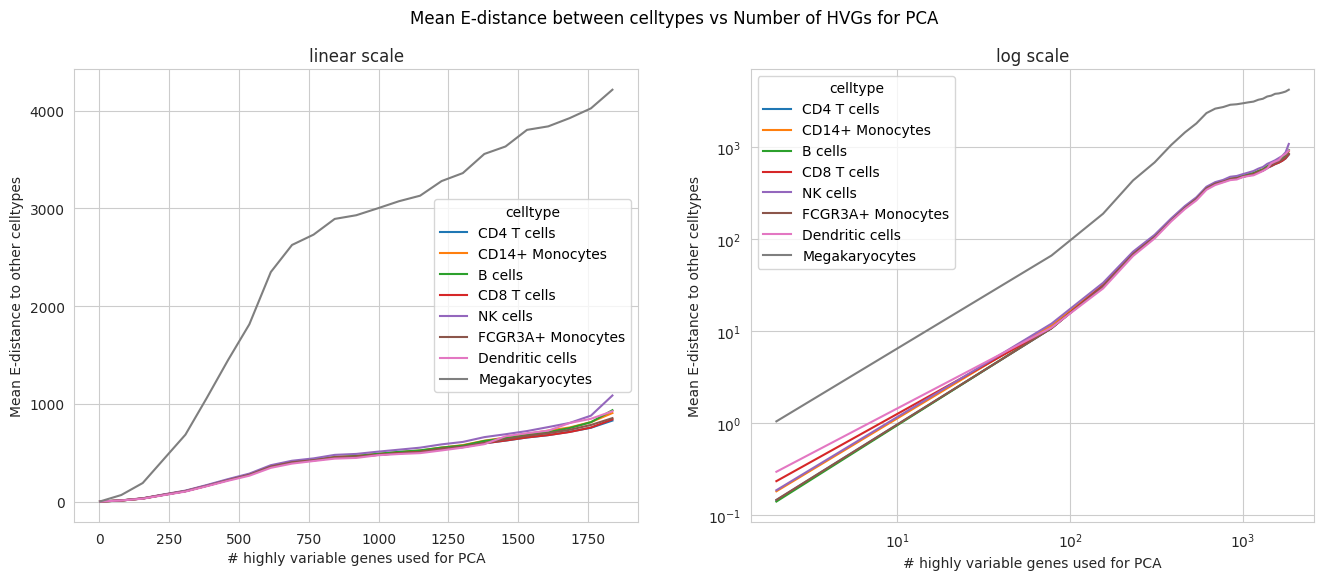

In [65]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 2, figsize=(8*2,6), dpi=100)
ax=axs[0]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('# highly variable genes used for PCA')
ax.legend(title='celltype')
ax.set_title('linear scale')

ax=axs[1]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('# highly variable genes used for PCA')
ax.legend(title='celltype')
ax.set_title('log scale')

pl.suptitle('Mean E-distance between celltypes vs Number of HVGs for PCA')

pl.show()

In [75]:
sdf = (df.T/(df.index)).T

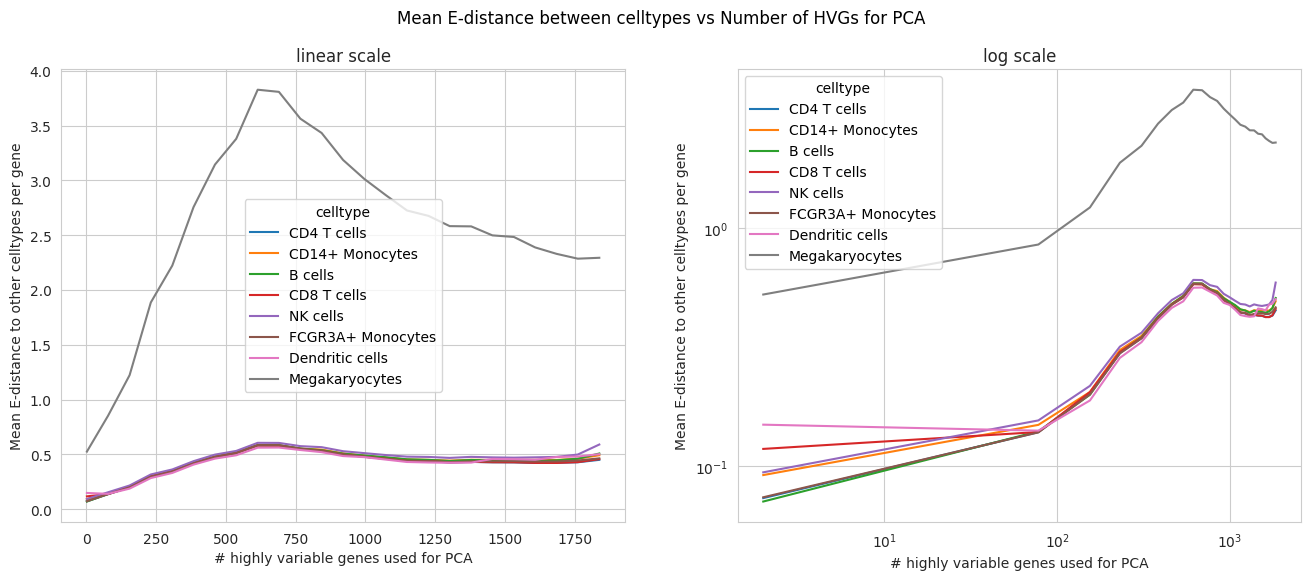

In [78]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 2, figsize=(8*2,6), dpi=100)
ax=axs[0]
sns.lineplot(data=sdf.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Mean E-distance to other celltypes per gene')
ax.set_xlabel('# highly variable genes used for PCA')
ax.legend(title='celltype')
ax.set_title('linear scale')

ax=axs[1]
sns.lineplot(data=sdf.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Mean E-distance to other celltypes per gene')
ax.set_xlabel('# highly variable genes used for PCA')
ax.legend(title='celltype')
ax.set_title('log scale')

pl.suptitle('Mean E-distance between celltypes vs Number of HVGs for PCA')

pl.show()

### self-normalized

In [192]:
adata = sc.datasets.pbmc3k()  # raw counts
odata = sc.datasets.pbmc3k_processed()  # annotated
adata = adata[odata.obs_names].copy()
adata.obs = odata.obs  # take annotation
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

In [198]:
eds = []
# ns = [adata.n_vars, 1750, 1500, 1250, 1000, 750, 500, 250, 100, 75, 50, 25, 10]
ns = np.linspace(15000, 2, num=25)
for n in tqdm(ns):
    sc.pp.highly_variable_genes(adata, n_top_genes=int(n))
    sc.pp.pca(adata)
    ed = edist(adata, 'louvain', verbose=False)
    eds.append(ed)

100%|██████████| 25/25 [00:52<00:00,  2.11s/it]


In [199]:
df = pd.DataFrame(np.mean(eds, axis=1), index=np.array(ns, dtype=int), columns=ed.columns)
df.head()

,CD4 T cells,B cells,CD14+ Monocytes,NK cells,CD8 T cells,FCGR3A+ Monocytes,Dendritic cells,Megakaryocytes
15000,301.504879,327.426740,311.726869,333.628209,269.408637,321.644284,285.257044,787.474462
14375,285.547557,313.128028,301.273336,322.253603,257.966506,310.217652,273.973857,737.743426
13750,283.074428,310.063084,298.892557,318.855997,255.628930,308.143354,271.365276,730.441024
13125,276.299350,302.891547,292.899295,313.672017,250.778396,302.727562,265.907472,706.158395
12500,268.313329,296.189227,288.282993,308.423129,245.006032,296.623585,260.281963,686.354704


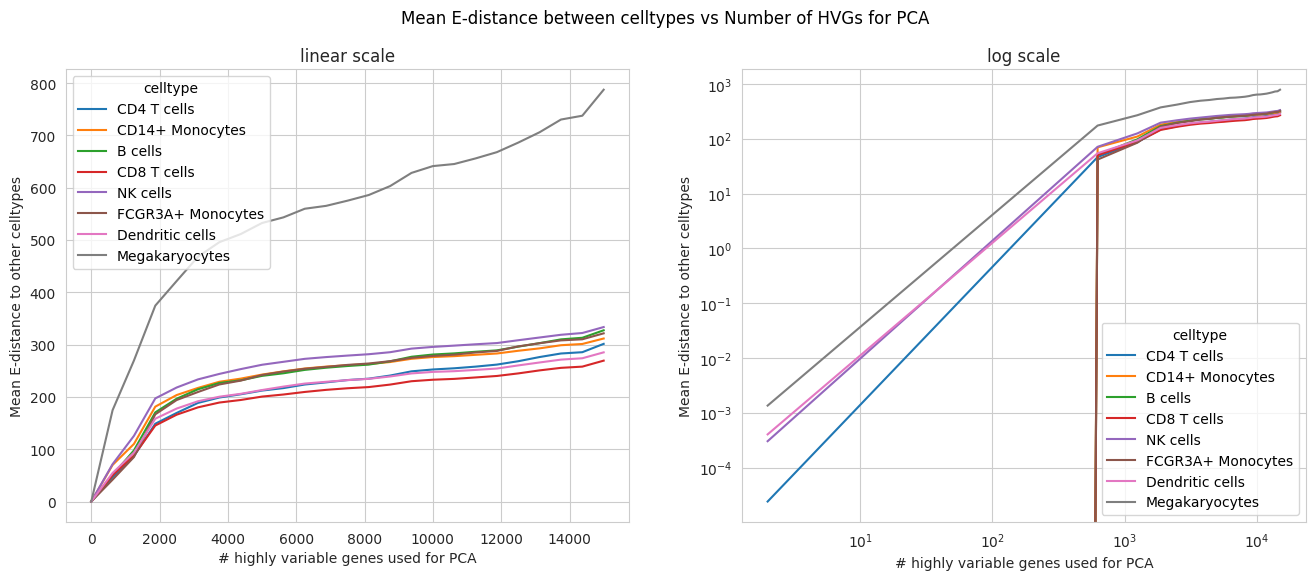

In [200]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 2, figsize=(8*2,6), dpi=100)
ax=axs[0]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('# highly variable genes used for PCA')
ax.legend(title='celltype')
ax.set_title('linear scale')

ax=axs[1]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('# highly variable genes used for PCA')
ax.legend(title='celltype')
ax.set_title('log scale')

pl.suptitle('Mean E-distance between celltypes vs Number of HVGs for PCA')

pl.show()

In [201]:
sdf = (df.T/(df.index)).T

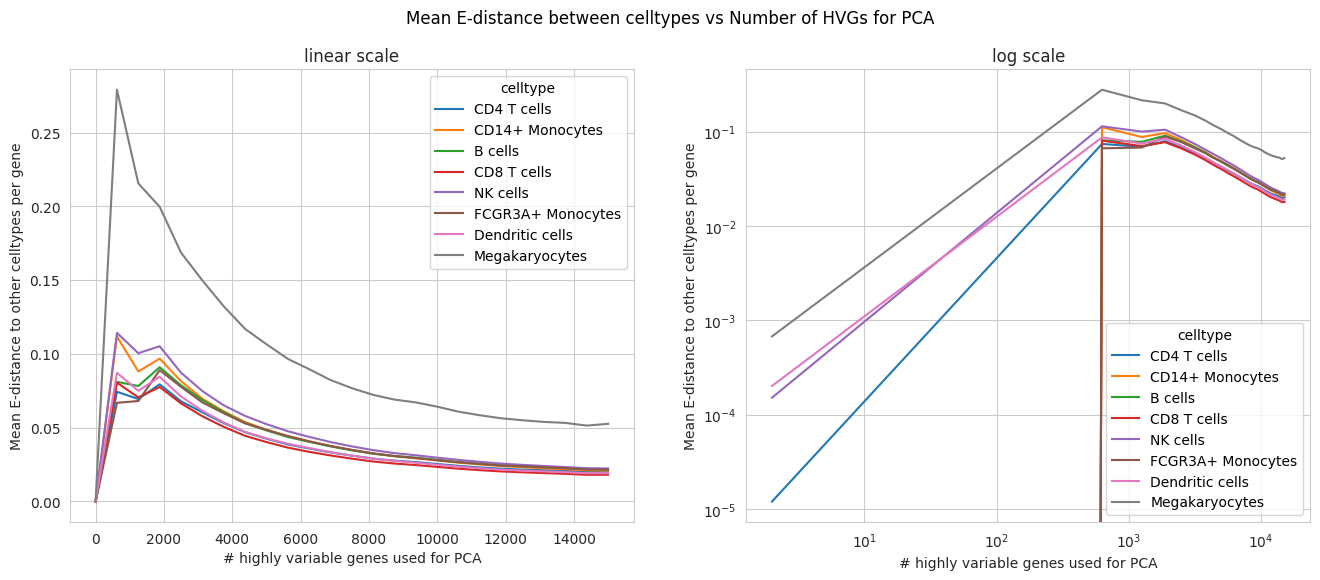

In [202]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 2, figsize=(8*2,6), dpi=100)
ax=axs[0]
sns.lineplot(data=sdf.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Mean E-distance to other celltypes per gene')
ax.set_xlabel('# highly variable genes used for PCA')
ax.legend(title='celltype')
ax.set_title('linear scale')

ax=axs[1]
sns.lineplot(data=sdf.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Mean E-distance to other celltypes per gene')
ax.set_xlabel('# highly variable genes used for PCA')
ax.legend(title='celltype')
ax.set_title('log scale')

pl.suptitle('Mean E-distance between celltypes vs Number of HVGs for PCA')

pl.show()

## Dependence on number of cells

### Pre-normalized

In [79]:
adata = sc.datasets.pbmc3k_processed()

In [125]:
eds = []
ncells = []
ns = np.linspace(0.05, 1, num=100)
for n in tqdm(ns):
    tdata = sc.pp.subsample(adata, fraction=n, copy=True)
    sc.pp.pca(tdata, use_highly_variable=False)
    ed = edist(tdata, 'louvain', verbose=False)
    eds.append(ed)
    ncells.append(tdata.obs.louvain.value_counts())

100%|██████████| 100/100 [00:38<00:00,  2.61it/s]


In [126]:
df = pd.DataFrame([ed.mean(0) for ed in eds], index=ns)
df.head()

,CD4 T cells,FCGR3A+ Monocytes,B cells,CD8 T cells,CD14+ Monocytes,NK cells,Dendritic cells,Megakaryocytes
0.050000,373.346647,361.454951,470.618847,372.791973,478.412470,752.117355,705.455534,NaN
0.059596,376.585072,387.277888,486.963289,387.204153,478.120808,756.647086,709.649089,NaN
0.069192,385.939727,392.644657,491.342799,383.479397,484.969242,752.661128,717.866022,NaN
0.078788,377.327345,389.906931,488.212149,398.922745,485.270747,710.856042,727.781099,NaN
0.088384,377.369968,398.676066,481.066265,385.459122,482.988099,710.984361,726.669515,NaN


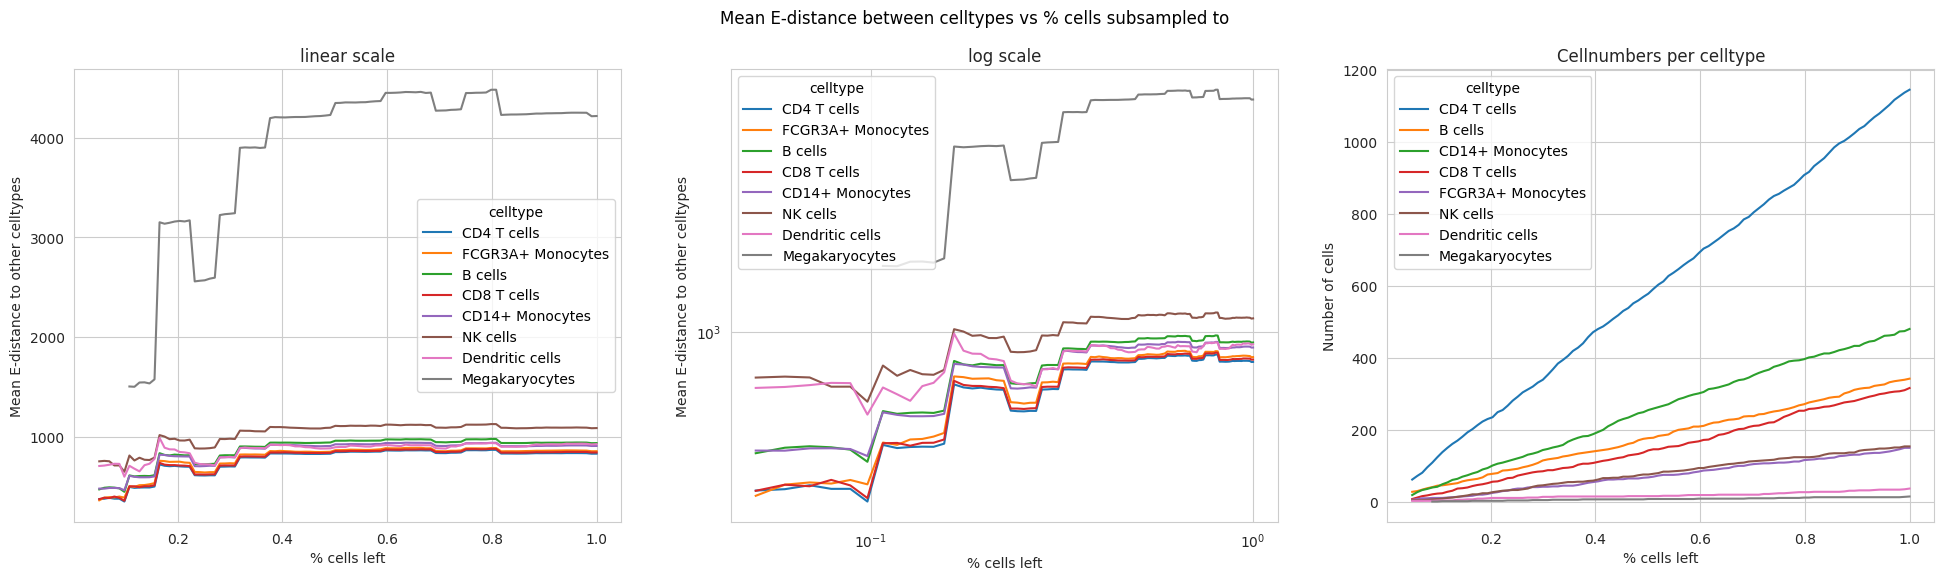

In [127]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 3, figsize=(8*3,6), dpi=100)
ax=axs[0]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('% cells left')
ax.legend(title='celltype')
ax.set_title('linear scale')

ax=axs[1]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('% cells left')
ax.legend(title='celltype')
ax.set_title('log scale')

ax=axs[2]
ndf = pd.DataFrame(ncells, index=ns)
sns.lineplot(data=ndf.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Number of cells')
ax.set_xlabel('% cells left')
ax.legend(title='celltype')
ax.set_title('Cellnumbers per celltype')

pl.suptitle('Mean E-distance between celltypes vs % cells subsampled to')

pl.show()

### Self-normalized

In [188]:
adata = sc.datasets.pbmc3k()  # raw counts
odata = sc.datasets.pbmc3k_processed()  # annotated
adata = adata[odata.obs_names].copy()
adata.obs = odata.obs  # take annotation
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)

In [189]:
eds = []
ncells = []
ns = np.linspace(0.05, 1, num=100)
for n in tqdm(ns):
    tdata = sc.pp.subsample(adata, fraction=n, copy=True)
    sc.pp.pca(tdata, use_highly_variable=False)
    ed = edist(tdata, 'louvain', verbose=False)
    eds.append(ed)
    ncells.append(tdata.obs.louvain.value_counts())

100%|██████████| 100/100 [02:48<00:00,  1.68s/it]


In [190]:
df = pd.DataFrame([ed.mean(0) for ed in eds], index=ns)
df.head()

,CD4 T cells,FCGR3A+ Monocytes,B cells,CD8 T cells,CD14+ Monocytes,NK cells,Dendritic cells,Megakaryocytes
0.050000,250.726403,296.248297,283.488850,244.913147,276.726631,321.133216,260.094213,NaN
0.059596,245.493700,290.048861,278.920012,229.792843,264.554022,311.520236,234.733416,NaN
0.069192,241.119158,279.602707,276.149962,219.236557,259.266417,308.900113,229.009071,NaN
0.078788,236.952372,275.939379,274.050425,220.686174,258.575489,302.482404,227.621436,NaN
0.088384,238.405994,274.408003,273.145046,214.004562,258.029800,308.997595,222.750205,NaN


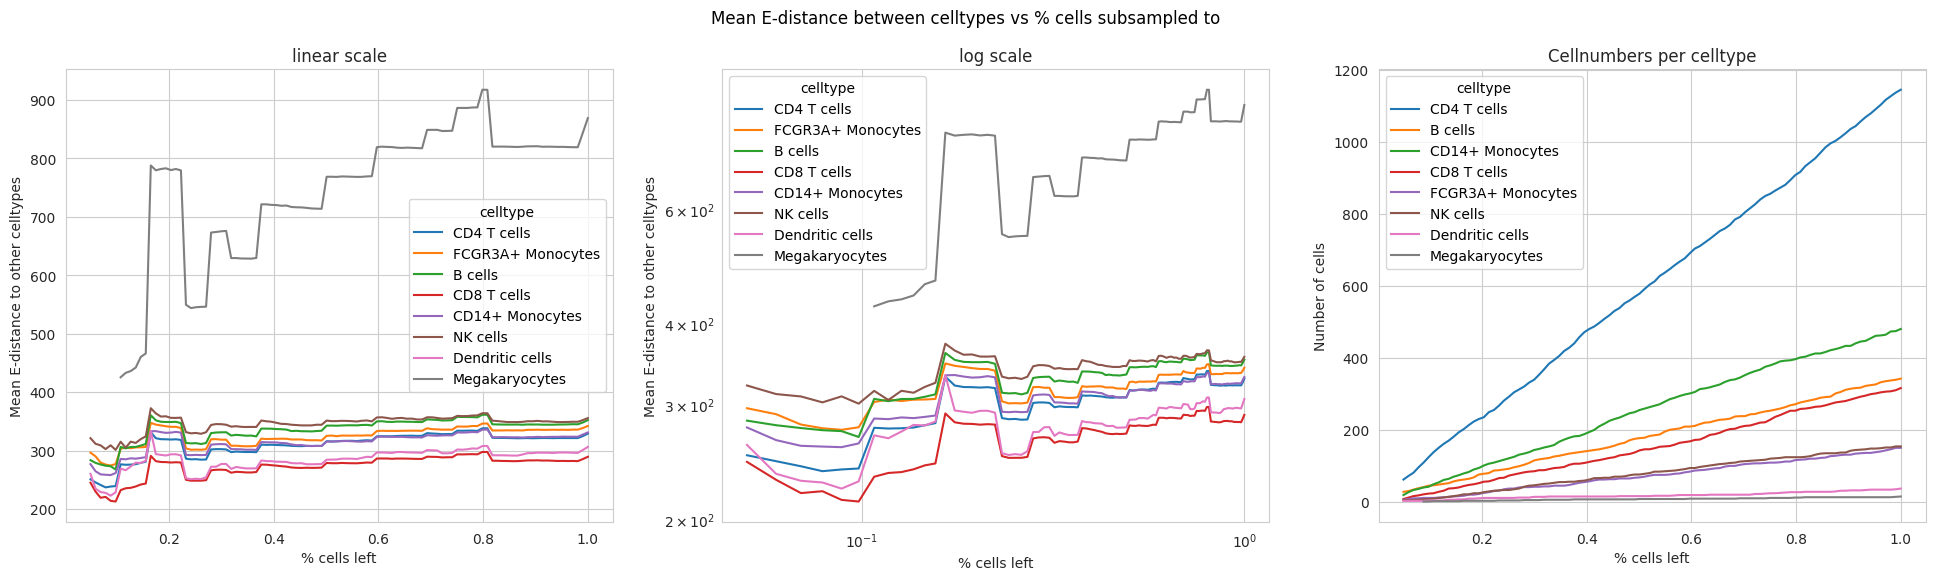

In [191]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 3, figsize=(8*3,6), dpi=100)
ax=axs[0]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('% cells left')
ax.legend(title='celltype')
ax.set_title('linear scale')

ax=axs[1]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('% cells left')
ax.legend(title='celltype')
ax.set_title('log scale')

ax=axs[2]
ndf = pd.DataFrame(ncells, index=ns)
sns.lineplot(data=ndf.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Number of cells')
ax.set_xlabel('% cells left')
ax.legend(title='celltype')
ax.set_title('Cellnumbers per celltype')

pl.suptitle('Mean E-distance between celltypes vs % cells subsampled to')

pl.show()

## Dependence on counts

In [151]:
adata = sc.datasets.pbmc3k()  # raw counts
odata = sc.datasets.pbmc3k_processed()  # annotated
adata = adata[odata.obs_names].copy()
adata.obs = odata.obs  # take annotation

In [184]:
eds = []
ncounts = []
ns = np.linspace(0.01, 1, num=20)
total_counts = np.sum(adata.X>0)
for n in tqdm(ns):
    tdata = sc.pp.downsample_counts(adata, total_counts=int(n*total_counts), copy=True)
    tdata.obs['ncounts'] = tdata.X.sum(1)
    ncounts.append(tdata.obs.groupby('louvain').mean()['ncounts'])
    sc.pp.normalize_per_cell(tdata)
    sc.pp.log1p(tdata)
    sc.pp.highly_variable_genes(tdata, n_top_genes=2000)
    sc.pp.pca(tdata, use_highly_variable=False)
    ed = edist(tdata, 'louvain', verbose=False)
    eds.append(ed)

100%|██████████| 20/20 [00:34<00:00,  1.70s/it]


In [185]:
df = pd.DataFrame([ed.mean(0) for ed in eds], index=ns)
df

,CD4 T cells,B cells,CD14+ Monocytes,NK cells,CD8 T cells,FCGR3A+ Monocytes,Dendritic cells,Megakaryocytes
0.010000,0.094586,0.085467,0.104238,0.076234,0.080600,0.150620,0.065473,0.093572
0.062105,2.930361,2.664162,3.263813,2.868255,2.313195,3.428527,2.583457,3.748741
0.114211,7.964589,7.337465,8.372054,7.975218,6.191633,8.328704,7.005137,11.581375
0.166316,13.656734,12.582452,14.101014,13.413092,10.581276,13.900269,12.078102,20.544998
0.218421,20.198692,18.836631,20.354340,19.424471,15.510069,19.852964,17.473952,32.579587
0.270526,26.775825,25.328219,26.957491,26.053903,20.635905,25.994661,23.288607,44.928800
0.322632,34.252300,32.692985,33.963525,33.229687,26.432617,32.977158,30.352908,61.791801
0.374737,41.514823,40.048390,40.747448,40.478451,32.221229,39.882071,36.285148,78.574389
0.426842,49.228863,47.773140,48.214428,48.486073,38.507713,47.323040,43.133361,97.660215
0.478947,57.142319,55.947959,55.639367,56.435402,45.012128,54.757903,49.931901,118.721623


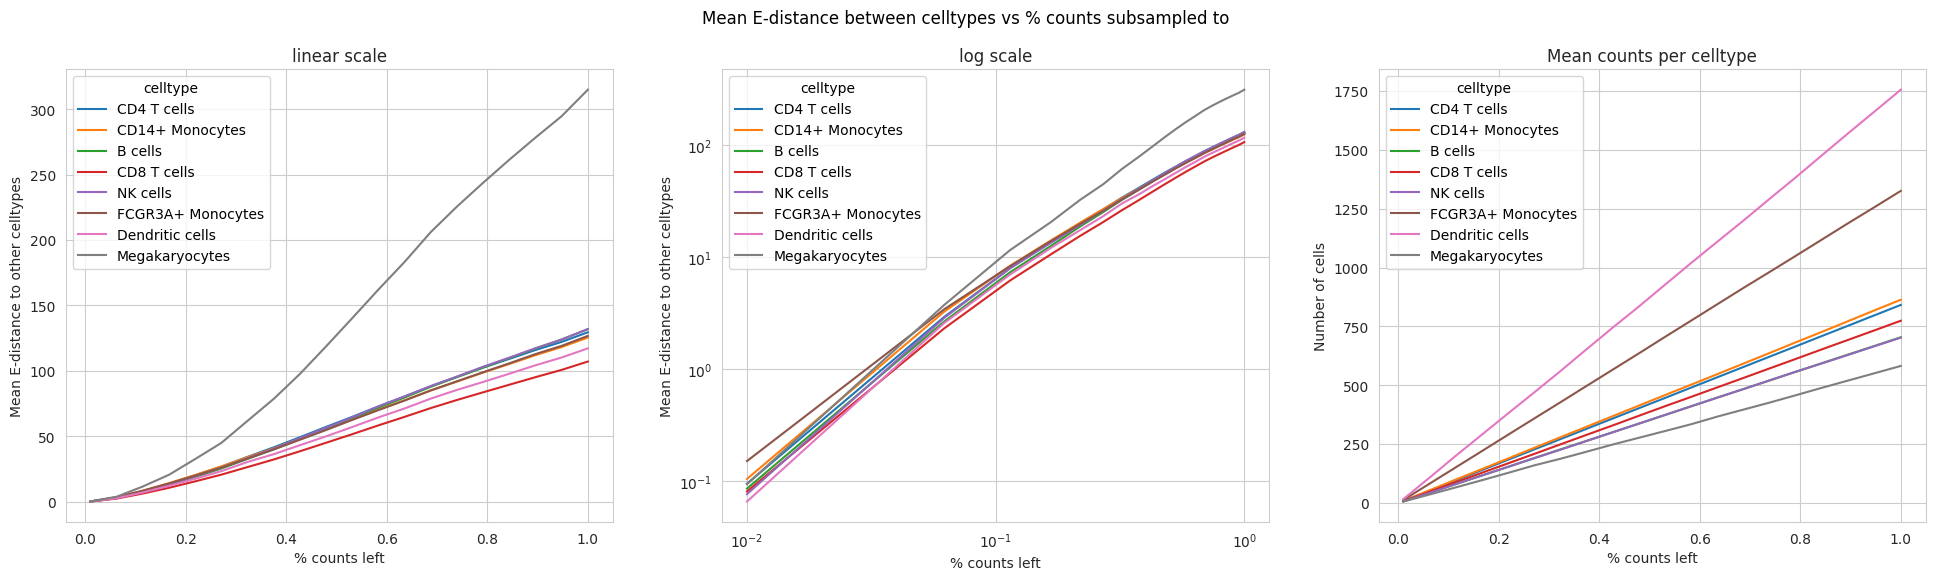

In [186]:
with sns.axes_style('whitegrid'):
    fig, axs = pl.subplots(1, 3, figsize=(8*3,6), dpi=100)
ax=axs[0]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('% counts left')
ax.legend(title='celltype')
ax.set_title('linear scale')

ax=axs[1]
sns.lineplot(data=df.stack().reset_index(), x='level_0', y=0, hue='level_1', ax=ax)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylabel('Mean E-distance to other celltypes')
ax.set_xlabel('% counts left')
ax.legend(title='celltype')
ax.set_title('log scale')

ax=axs[2]
ndf = pd.DataFrame(ncounts, index=ns)
sns.lineplot(data=ndf.stack().reset_index(), x='level_0', y=0, hue='louvain', ax=ax)
ax.set_ylabel('Number of cells')
ax.set_xlabel('% counts left')
ax.legend(title='celltype')
ax.set_title('Mean counts per celltype')

pl.suptitle('Mean E-distance between celltypes vs % counts subsampled to')

pl.show()